<h1 style="background-color:blue;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;">Vehicle Insurance</h1>


<center><img src="vehicle insurance.jpg",height='500',width='600'></center>


<h1 style="background-color:blue;font-family:newtimeroman;font-size:450%;text-align:center;border-radius: 15px 50px;">Content</h1>

1. [OverView of Data](#0)
1. [Importing modules and Loading datasets](#1)
1. [Univariate Analysis](#2)
   1. [Gender](#3)
   1. [Vehicle Age](#4)
   1. [Vehicle Damage](#5)
   1. [Age](#6)
       1. [Scaling down Age](#7)
       1. [correlation](#8)
   1. [Annual Premium](#9)
       1. [Scaling down Annual premium](#10)
       1. [correlation](#11)
1. [Multivariate Analysis](#24)
1. [Using SMOTE to solve the problem of imbalanced data](#12)
1. [Spliting data](#13)
1. [Model selection and evaluation](#14)
    1. [DecisionTreeClassifier](#15)
    1. [ RandomForestRegressor](#16)
    1. [LogisticRegression](#17)
    1. [KNN Classifier](#18)
    1. [XGBClassifier](#19)
    1. [GradientBoostingClassifier](#20)
    1. [ CategoricalNB](#21)
    1. [LinearSVC](#22)
1. [Conclusion](#23)   

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">OverView of Data</h1>
<a id=0></a>

<font color='blue' size="4" >
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.
</font>

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Importing modules and Loading datasets</h1>
<a id=1></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

<Figure size 1440x1080 with 0 Axes>

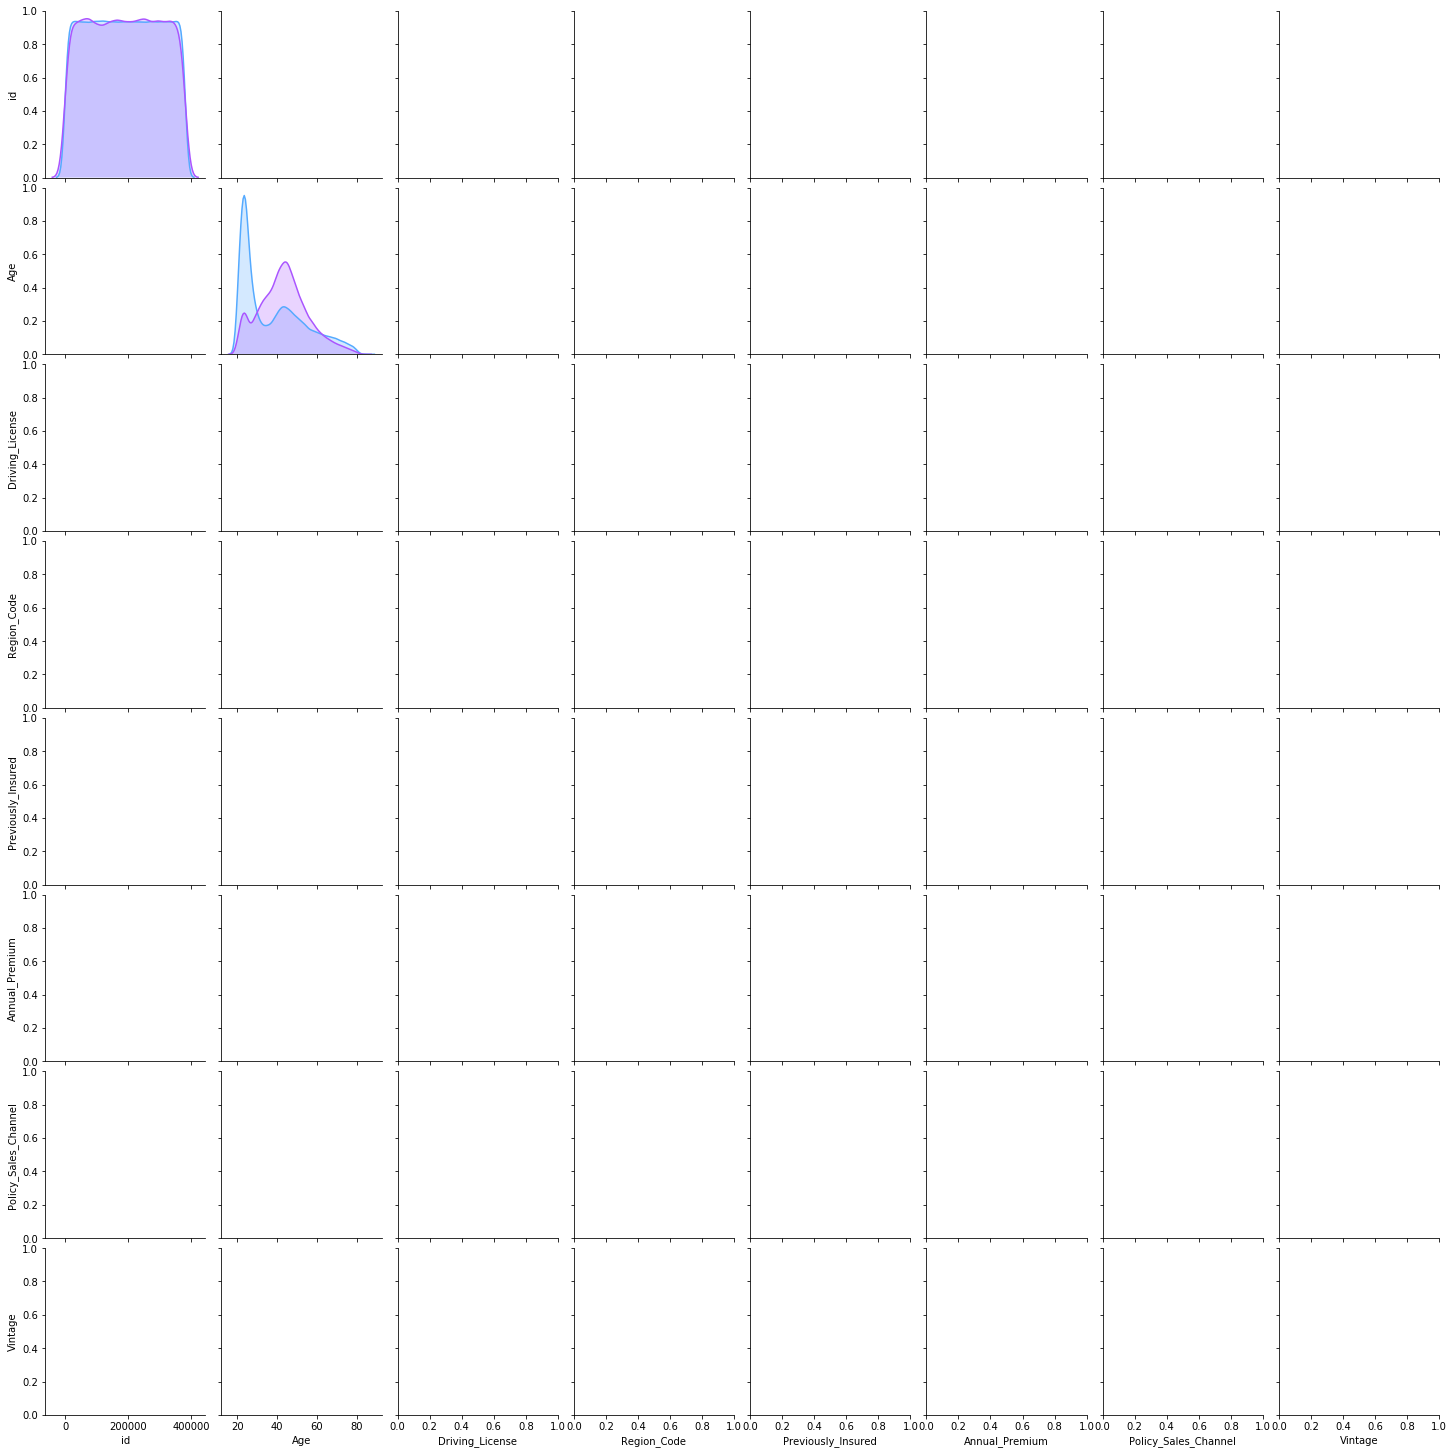

In [4]:
plt.figure(figsize=(20,15))
sns.pairplot(data,palette='cool',hue='Response')
plt.show()

In [2]:
data=pd.read_csv('train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
data.drop(['id'],inplace=True,axis=1)
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Univariate Analysis</h1>
<a id=2></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Gender</h1>
<a id=3></a>

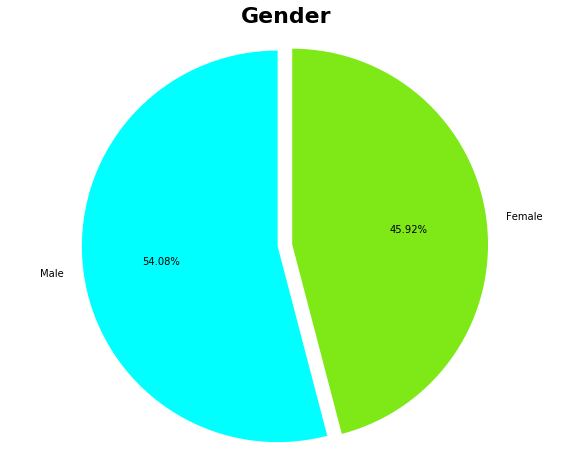

In [7]:
plt.figure(figsize=(10,8))
plt.pie(data.Gender.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#00FFFF','#7FE817'],radius=4,labels=['Male','Female'])
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

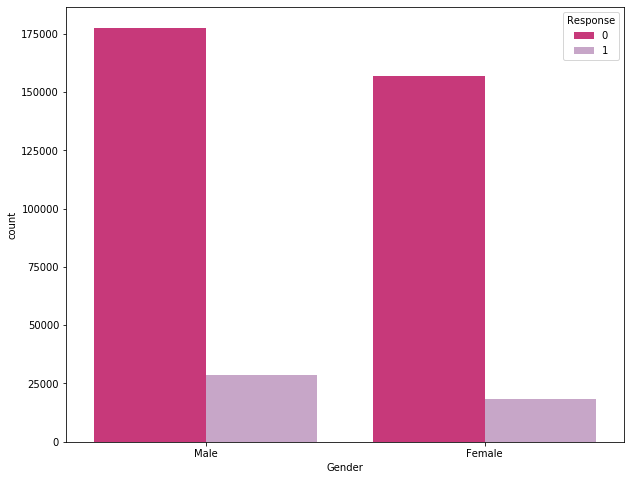

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=data.Response,palette='PuRd_r')
plt.show()

In [9]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes
correlation1=data.corr()

In [10]:
correlation1[['Gender']].sort_values(by='Gender',ascending=False).style.background_gradient(cmap='cool_r')

,Gender
Gender,1.000000
Policy_Sales_Channel,0.111159
Previously_Insured,0.081932
Driving_License,0.018374
Vintage,0.002517
Region_Code,-0.000604
Annual_Premium,-0.003673
Response,-0.052440
Age,-0.145545


<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Vehical Age</h1>
<a id=4></a>

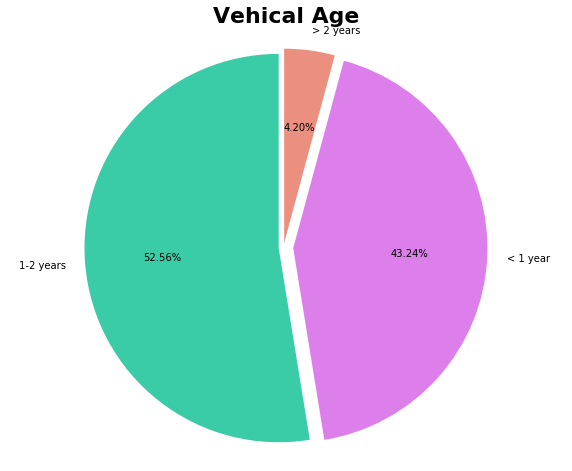

In [11]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%',radius=4,colors=['#3ACCA7','#DD7FEB','#EB8F7F'],labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

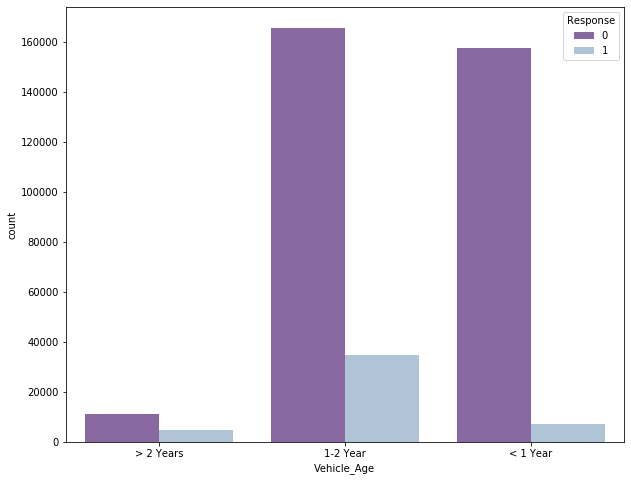

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Age,hue=data.Response,palette='BuPu_r')
plt.show()

In [13]:
data.Vehicle_Age=pd.Categorical(data.Vehicle_Age,categories=['1-2 Year','< 1 Year','> 2 Years'],ordered=True).codes
correlation2=data.corr()

In [14]:
correlation2[['Vehicle_Age']].sort_values(['Vehicle_Age'],ascending=False).style.background_gradient(cmap='PiYG')

,Vehicle_Age
Vehicle_Age,1.000000
Policy_Sales_Channel,0.388551
Previously_Insured,0.174783
Gender,0.112625
Driving_License,0.030173
Annual_Premium,0.023656
Vintage,0.002484
Region_Code,-0.027840
Response,-0.104078
Age,-0.522300


<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Vehicle Damage</h1>
<a id=5></a>

In [15]:
data.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

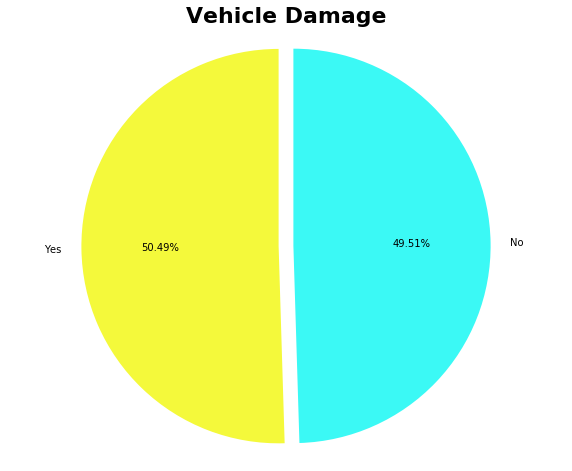

In [16]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#F4F93B','#3BF9F5'],radius=4,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

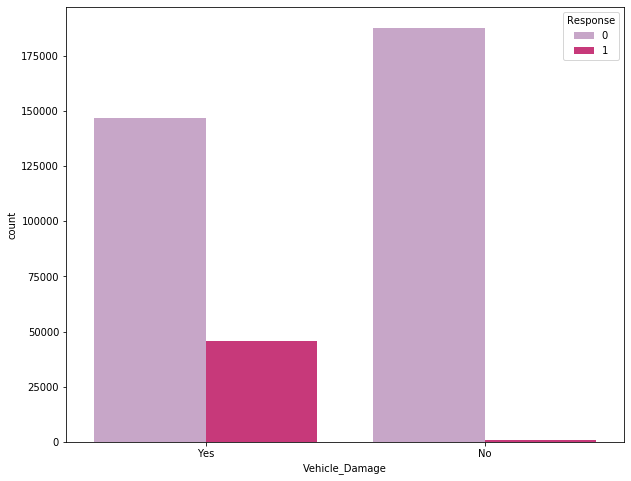

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Damage,hue=data.Response,palette='PuRd')
plt.show()

In [18]:
data.Vehicle_Damage=pd.Categorical(data.Vehicle_Damage,categories=['Yes','No'],ordered=True).codes
correlation3=data.corr()

In [19]:
correlation3[['Vehicle_Damage']].sort_values(by='Vehicle_Damage',ascending=False).style.background_gradient(cmap='viridis')

,Vehicle_Damage
Vehicle_Damage,1.000000
Previously_Insured,0.824143
Policy_Sales_Channel,0.224377
Vehicle_Age,0.174238
Gender,0.091606
Driving_License,0.016622
Vintage,0.002064
Annual_Premium,-0.009349
Region_Code,-0.028235
Age,-0.267534


Here it is quite evident that vehicle damage is highly correlated with, the feature that is that was previously insured?


<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Age</h1>
<a id=6></a>

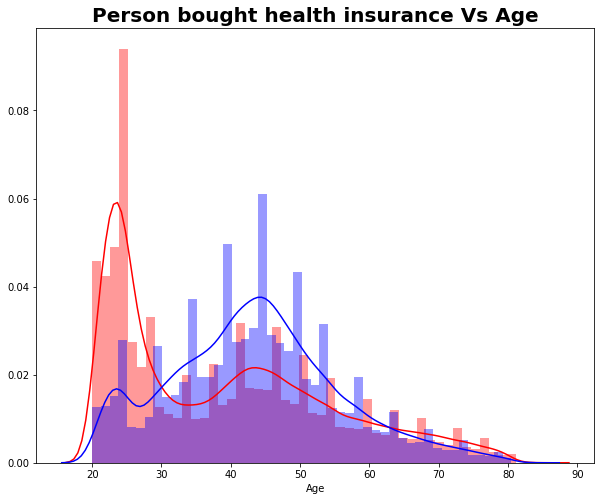

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==1],color='blue')
plt.title('Person bought health insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

Age group of 40-50 have higher chance of buying the health insurance

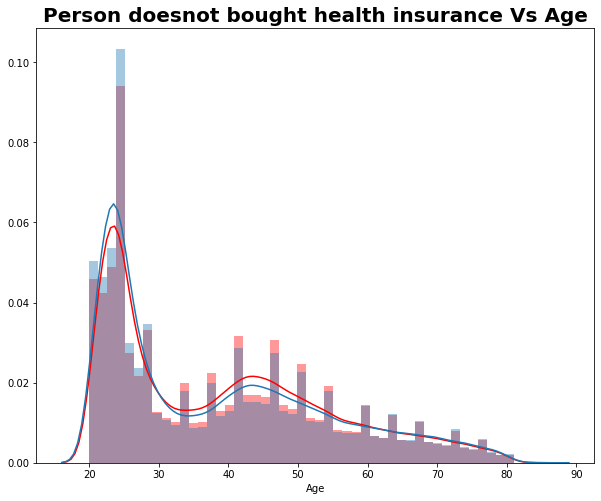

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==0])
plt.title('Person doesnot bought health insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Scaling Down Age</h1>
<a id=7></a>

In [22]:
max_age=max(data.Age)
min_age=min(data.Age)
data.Age=data.Age.apply(lambda x: (x-min_age)/(max_age-min_age))


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">correlation</h1>
<a id=8></a>

In [23]:
correlation=data.corr()
correlation[['Age']].sort_values(by='Age',ascending=False).style.background_gradient(cmap='Blues_r')

,Age
Age,1.000000
Response,0.111147
Annual_Premium,0.067507
Region_Code,0.042574
Vintage,-0.001264
Driving_License,-0.079782
Gender,-0.145545
Previously_Insured,-0.254682
Vehicle_Damage,-0.267534
Vehicle_Age,-0.522300



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Annual premium</h1>
<a id=9></a>

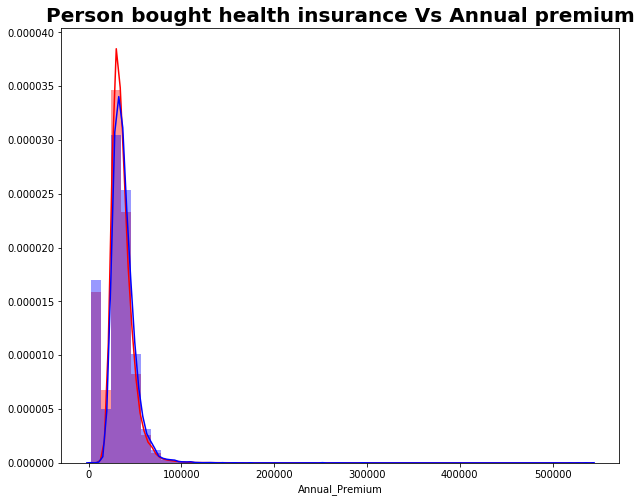

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(data.Annual_Premium[data.Response==1],color='blue')
plt.title('Person bought health insurance Vs Annual premium',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

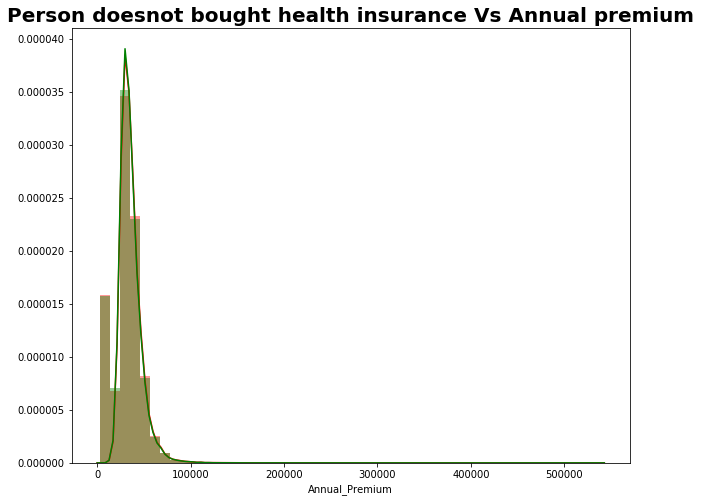

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(data.Annual_Premium[data.Response==0],color='green')
plt.title('Person doesnot bought health insurance Vs Annual premium',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Scaling Down Annual premium</h1>
<a id=10></a>

In [26]:
max_premium=max(data.Annual_Premium)
min_premium=min(data.Annual_Premium)
data.Annual_Premium=data.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">correlation</h1>
<a id=11></a>

In [27]:

correlation[['Annual_Premium']].sort_values(by='Annual_Premium',ascending=False).style.background_gradient(cmap='Blues')

,Annual_Premium
Annual_Premium,1.000000
Age,0.067507
Vehicle_Age,0.023656
Response,0.022575
Previously_Insured,0.004269
Vintage,-0.000608
Gender,-0.003673
Vehicle_Damage,-0.009349
Region_Code,-0.010588
Driving_License,-0.011906


<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Multivariate Analysis</h1>
<a id=24></a>

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap='cool_r')
plt.show()

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Using SMOTE to solve the problem of imbalanced data</h1>
<a id=12></a>

In [28]:
oversample=SMOTE()
X,y=oversample.fit_resample(data.iloc[:,:10],data.iloc[:,10])

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Spliting train-test Data</h1>
<a id=13></a>

In [29]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.1,random_state=42)

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Model training And Evaluation</h1>
<a id=14></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">DecisionTreeClassifier</h1>
<a id=15></a>

In [30]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': range(5, 8)})

In [31]:
grid1.best_params_

{'max_depth': 7}

In [32]:
classifier1=DecisionTreeClassifier(random_state=42,max_depth=7)
classifier1.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=7, random_state=42)

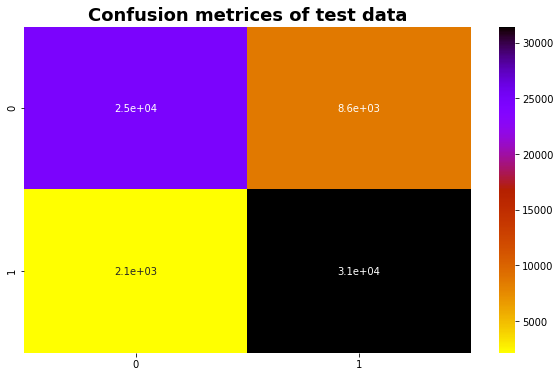

In [33]:
pred_test_y=classifier1.predict(test_x)
pred_train_y=classifier1.predict(train_x)
cm1=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,cmap='gnuplot_r')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [34]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82    301112
           1       0.78      0.94      0.85    300806

    accuracy                           0.84    601918
   macro avg       0.85      0.84      0.84    601918
weighted avg       0.85      0.84      0.84    601918



In [36]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82     33287
           1       0.79      0.94      0.85     33593

    accuracy                           0.84     66880
   macro avg       0.85      0.84      0.84     66880
weighted avg       0.85      0.84      0.84     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">RandomForestClassifier</h1>
<a id=16></a>

In [38]:
classifier2=RandomForestClassifier(random_state=42,max_depth=6)
classifier2.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, random_state=42)

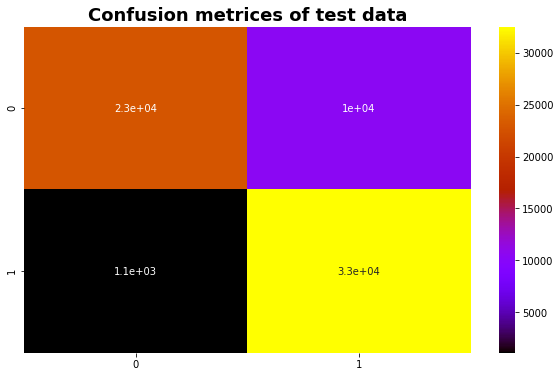

In [39]:
pred_test_y=classifier2.predict(test_x)
pred_train_y=classifier2.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [40]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80    301112
           1       0.75      0.97      0.85    300806

    accuracy                           0.83    601918
   macro avg       0.85      0.83      0.82    601918
weighted avg       0.85      0.83      0.82    601918



In [42]:
print('Classification report of train data \n',classification_report(test_y,pred_test_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     33287
           1       0.76      0.97      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.86      0.83      0.82     66880
weighted avg       0.86      0.83      0.82     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Logistic Regression</h1>
<a id=17></a>

In [44]:
classifier3=LogisticRegression(tol=0.01,max_iter=1000)
classifier3.fit(train_x,train_y)

LogisticRegression(max_iter=1000, tol=0.01)

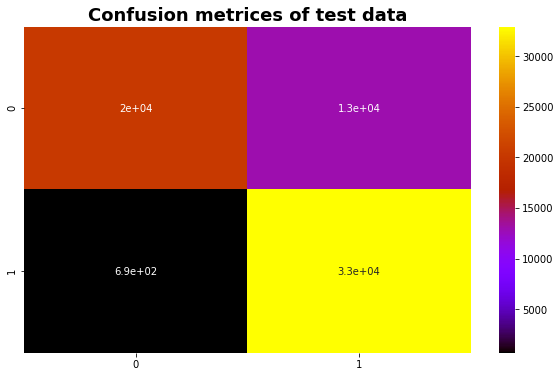

In [45]:
pred_test_y=classifier3.predict(test_x)
pred_train_y=classifier3.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [46]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.97      0.61      0.74    301112
           1       0.71      0.98      0.83    300806

    accuracy                           0.79    601918
   macro avg       0.84      0.79      0.78    601918
weighted avg       0.84      0.79      0.78    601918



In [48]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75     33287
           1       0.72      0.98      0.83     33593

    accuracy                           0.80     66880
   macro avg       0.84      0.79      0.79     66880
weighted avg       0.84      0.80      0.79     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">KNN Classifier</h1>
<a id=18></a>

In [50]:
classifier4=KNeighborsClassifier(n_neighbors=100)
classifier4.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=100)

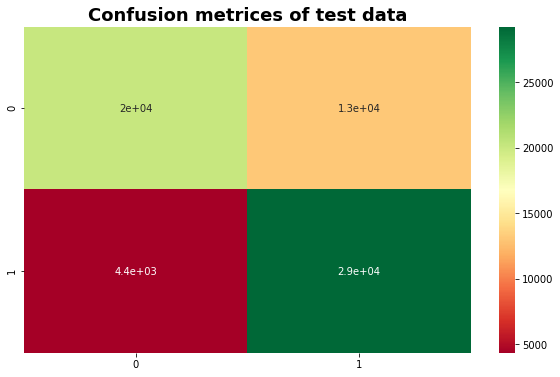

In [51]:
pred_test_y=classifier4.predict(test_x)
pred_train_y=classifier4.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [52]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.83      0.61      0.70    301112
           1       0.69      0.88      0.77    300806

    accuracy                           0.74    601918
   macro avg       0.76      0.74      0.74    601918
weighted avg       0.76      0.74      0.74    601918



In [54]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.82      0.61      0.70     33287
           1       0.69      0.87      0.77     33593

    accuracy                           0.74     66880
   macro avg       0.76      0.74      0.73     66880
weighted avg       0.76      0.74      0.73     66880




<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">XGBoostClassifier</h1>
<a id=19></a>

In [70]:
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

C:\Users\abhij\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

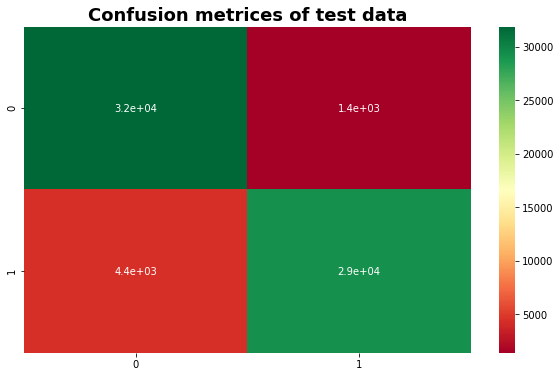

In [71]:
pred_test_y=classifier5.predict(test_x)
pred_train_y=classifier5.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [72]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    301112
           1       0.96      0.87      0.91    300806

    accuracy                           0.92    601918
   macro avg       0.92      0.92      0.92    601918
weighted avg       0.92      0.92      0.92    601918



In [73]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     33287
           1       0.95      0.87      0.91     33593

    accuracy                           0.91     66880
   macro avg       0.92      0.91      0.91     66880
weighted avg       0.92      0.91      0.91     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">GradientBoosting Classifier</h1>
<a id=20></a>

In [74]:
classifier6=GradientBoostingClassifier(random_state=42)
classifier6.fit(train_x,train_y)

GradientBoostingClassifier()

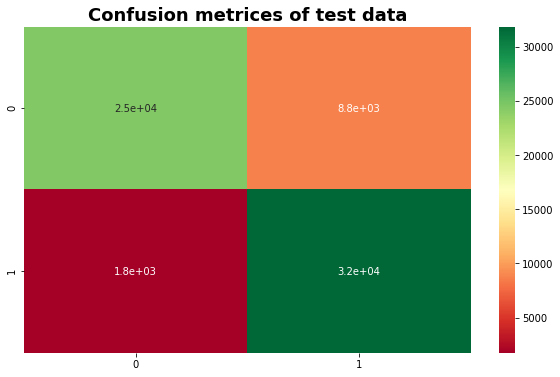

In [75]:
pred_test_y=classifier6.predict(test_x)
pred_train_y=classifier6.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [76]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82    301112
           1       0.78      0.95      0.86    300806

    accuracy                           0.84    601918
   macro avg       0.86      0.84      0.84    601918
weighted avg       0.86      0.84      0.84    601918



In [77]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     33287
           1       0.78      0.95      0.86     33593

    accuracy                           0.84     66880
   macro avg       0.86      0.84      0.84     66880
weighted avg       0.86      0.84      0.84     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">CategoricalNB</h1>
<a id=21></a>

In [56]:
classifier7=CategoricalNB()
classifier7.fit(train_x,train_y)

CategoricalNB()

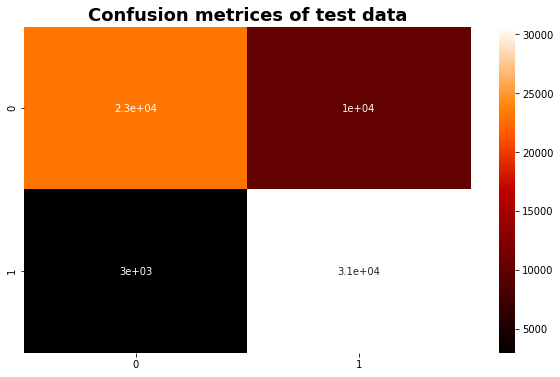

In [62]:
pred_test_y=classifier7.predict(test_x)
pred_train_y=classifier7.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gist_heat')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [58]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78    301112
           1       0.75      0.91      0.82    300806

    accuracy                           0.80    601918
   macro avg       0.82      0.80      0.80    601918
weighted avg       0.82      0.80      0.80    601918



In [59]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78     33287
           1       0.75      0.91      0.82     33593

    accuracy                           0.80     66880
   macro avg       0.82      0.80      0.80     66880
weighted avg       0.82      0.80      0.80     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">LinearSVC</h1>
<a id=22></a>

In [64]:
classifier8=LinearSVC()
classifier8.fit(train_x,train_y)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

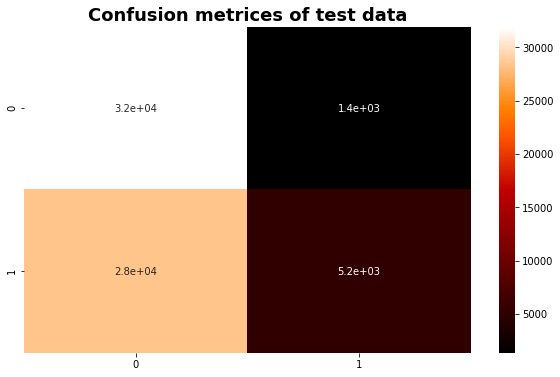

In [65]:
pred_test_y=classifier8.predict(test_x)
pred_train_y=classifier8.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gist_heat')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [66]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.53      0.96      0.68    301112
           1       0.79      0.15      0.26    300806

    accuracy                           0.56    601918
   macro avg       0.66      0.56      0.47    601918
weighted avg       0.66      0.56      0.47    601918



In [67]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.53      0.96      0.68     33287
           1       0.79      0.15      0.26     33593

    accuracy                           0.56     66880
   macro avg       0.66      0.56      0.47     66880
weighted avg       0.66      0.56      0.47     66880



<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Conclusion</h1>
<a id=23></a>

<font size='5' color='#1f45fc'>
    From the above analysis it is quite evidient that XGBoostClassifier works better than other algoriths. With test accuracy of about 91%.
    </font>

<font color='black' size='6'>
    If you liked the notebook or in any way it help you. Please upvote it!!<br><br>
    And if have any query or suggestion ask in comment section.<br>
    </font>